In [2]:
import pandas as pd
import numpy as np

crimen = pd.read_csv("../csv/crimen_nuev.csv")
aire = pd.read_csv("../csv/aire_2011_2020_v6.csv")

In [3]:
df_crimen = pd.DataFrame(crimen)
df_aire = pd.DataFrame(aire)

In [4]:
df_aire = df_aire.drop(df_aire.columns[0], axis=1)
df_crimen = df_crimen.drop(df_crimen.columns[0], axis=1)

In [ ]:
df_crimen

In [8]:
df_crimen = df_crimen.sort_values(by=['Dia', 'Mes', 'Anio', 'Hora'])

In [12]:
df_aire.isna().sum()

Dia          0
Mes          0
Anio         0
Hora         0
Lugar        0
Particula    0
Valor        0
Estado       0
Latitud      0
Longitud     0
Alcaldia     0
AQI          0
dtype: int64

In [23]:
df_crimen_2011 = df_crimen.loc[(df_crimen['Anio'] == 2011)]["Alcaldia"].value_counts()

In [96]:
#df_crimen_2011["IZTAPALAPA"]
#len(df_crimen_2011)
#df_crimen["Alcaldia"].unique()[0]
#df_aire
df_crimen_2011

IZTAPALAPA                41
COYOACAN                  22
TLALPAN                   16
CUAUHTEMOC                16
ALVARO OBREGON            15
IZTACALCO                 14
GUSTAVO A MADERO          13
MIGUEL HIDALGO            12
XOCHIMILCO                 9
VENUSTIANO CARRANZA        9
AZCAPOTZALCO               8
TLAHUAC                    7
LA MAGDALENA CONTRERAS     3
MILPA ALTA                 3
BENITO JUAREZ              3
CUAJIMALPA DE MORELOS      2
Name: Alcaldia, dtype: int64

In [87]:
#df_aire_2011 = df_aire.loc[(df_aire['Anio'] == 2011)][["Alcaldia","AQI"]]
df_aire_2011 = df_aire.loc[(df_aire['Anio'] == 2011)]["Alcaldia"].value_counts()

In [72]:
grouped_single = df_aire[(df_aire['Anio'] == 2011) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)

In [85]:
grouped_single.axes[0]

Index(['VENUSTIANO CARRANZA', 'TLAHUAC', 'IZTACALCO', 'AZCAPOTZALCO',
       'COYOACAN', 'ALVARO OBREGON', 'IZTAPALAPA', 'GUSTAVO A MADERO',
       'TLALPAN', 'CUAJIMALPA DE MORELOS'],
      dtype='object', name='Alcaldia')

In [91]:
series_aire_2011 = grouped_single.squeeze()

In [94]:
series_aire_2011

Alcaldia
VENUSTIANO CARRANZA      68.075325
TLAHUAC                  62.984631
IZTACALCO                58.183728
AZCAPOTZALCO             53.836677
COYOACAN                 53.697890
ALVARO OBREGON           50.622540
IZTAPALAPA               42.331640
GUSTAVO A MADERO         10.750303
TLALPAN                   6.880332
CUAJIMALPA DE MORELOS     6.788018
Name: (AQI, mean), dtype: float64

In [110]:
alcaldia_list = {}
        
for i in range(len(df_crimen_2011)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2011.axes[0]):
        item_alcaldia = []
        #print(df_crimen["Alcaldia"].unique()[i])
        #print(series_aire_2011[df_crimen["Alcaldia"].unique()[i]])
        #print(df_crimen_2011[df_crimen["Alcaldia"].unique()[i]])
        #print("\n")
        item_alcaldia.append(series_aire_2011[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2011[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

        #print("---No---\n")
        #print(df_crimen["Alcaldia"].unique()[i])
        #print("\n---No---")

In [111]:
alcaldia_list

{'IZTAPALAPA': [42.33163958641064, 41],
 'IZTACALCO': [58.18372799028537, 14],
 'GUSTAVO A MADERO': [10.750302736740132, 13],
 'ALVARO OBREGON': [50.622539812168235, 15],
 'VENUSTIANO CARRANZA': [68.07532531505275, 9],
 'COYOACAN': [53.69788956345764, 22],
 'AZCAPOTZALCO': [53.83667711598746, 8],
 'TLALPAN': [6.880332409972299, 16],
 'TLAHUAC': [62.984631414430844, 7],
 'CUAJIMALPA DE MORELOS': [6.788018433179723, 2]}

In [115]:
resume_alcaldia_2011 = pd.DataFrame(alcaldia_list, index =['avgAQI',
                                'No de crimenes'])

In [116]:
resume_alcaldia_2011 = resume_alcaldia_2011.transpose()

In [119]:
resume_alcaldia_2011

,avgAQI,No de crimenes
IZTAPALAPA,42.331640,41
IZTACALCO,58.183728,14
GUSTAVO A MADERO,10.750303,13
ALVARO OBREGON,50.622540,15
VENUSTIANO CARRANZA,68.075325,9
COYOACAN,53.697890,22
AZCAPOTZALCO,53.836677,8
TLALPAN,6.880332,16
TLAHUAC,62.984631,7
CUAJIMALPA DE MORELOS,6.788018,2


In [118]:
resume_alcaldia_2011['No de crimenes'] = resume_alcaldia_2011['No de crimenes'].astype('int64') 

In [127]:
resume_alcaldia_2011["avgAQI"].values

array([42.33163959, 58.18372799, 10.75030274, 50.62253981, 68.07532532,
       53.69788956, 53.83667712,  6.88033241, 62.98463141,  6.78801843])

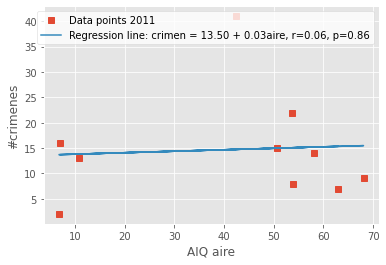

In [143]:
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2011["avgAQI"].values, resume_alcaldia_2011['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2011["avgAQI"].values, resume_alcaldia_2011['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2011')
ax.plot(resume_alcaldia_2011["avgAQI"].values, intercept + slope * resume_alcaldia_2011["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()


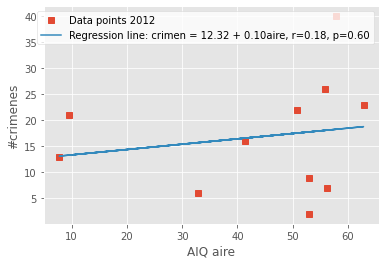

In [144]:
df_crimen_2012 = df_crimen.loc[(df_crimen['Anio'] == 2012)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2012) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2012 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2012)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2012.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2012[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2012[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2012 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2012 = resume_alcaldia_2012.transpose()
resume_alcaldia_2012['No de crimenes'] = resume_alcaldia_2012['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2012["avgAQI"].values, resume_alcaldia_2012['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2012["avgAQI"].values, resume_alcaldia_2012['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2012')
ax.plot(resume_alcaldia_2012["avgAQI"].values, intercept + slope * resume_alcaldia_2012["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

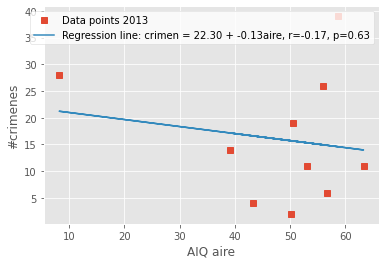

In [145]:
df_crimen_2013 = df_crimen.loc[(df_crimen['Anio'] == 2013)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2013) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2013 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2013)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2013.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2013[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2013[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2013 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2013 = resume_alcaldia_2013.transpose()
resume_alcaldia_2013['No de crimenes'] = resume_alcaldia_2013['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2013["avgAQI"].values, resume_alcaldia_2013['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2013["avgAQI"].values, resume_alcaldia_2013['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2013')
ax.plot(resume_alcaldia_2013["avgAQI"].values, intercept + slope * resume_alcaldia_2013["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

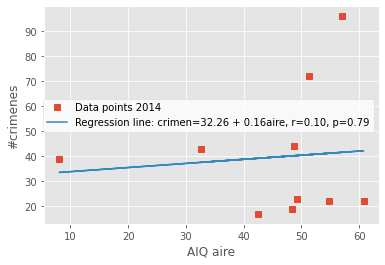

In [156]:
df_crimen_2014 = df_crimen.loc[(df_crimen['Anio'] == 2014)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2014) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2014 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2014)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2014.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2014[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2014[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2014 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2014 = resume_alcaldia_2014.transpose()
resume_alcaldia_2014['No de crimenes'] = resume_alcaldia_2014['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2014["avgAQI"].values, resume_alcaldia_2014['No de crimenes'].values)
line = f'Regression line: crimen={intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2014["avgAQI"].values, resume_alcaldia_2014['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2014')
ax.plot(resume_alcaldia_2014["avgAQI"].values, intercept + slope * resume_alcaldia_2014["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

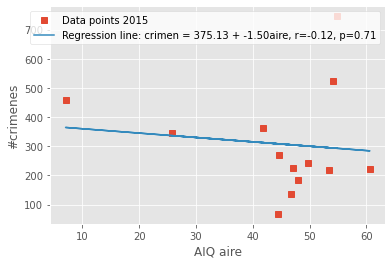

In [148]:
df_crimen_2015 = df_crimen.loc[(df_crimen['Anio'] == 2015)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2015) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2015 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2015)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2015.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2015[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2015[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2015 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2015 = resume_alcaldia_2015.transpose()
resume_alcaldia_2015['No de crimenes'] = resume_alcaldia_2015['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2015["avgAQI"].values, resume_alcaldia_2015['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2015["avgAQI"].values, resume_alcaldia_2015['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2015')
ax.plot(resume_alcaldia_2015["avgAQI"].values, intercept + slope * resume_alcaldia_2015["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

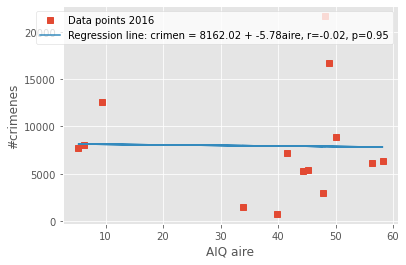

In [149]:
df_crimen_2016 = df_crimen.loc[(df_crimen['Anio'] == 2016)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2016) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2016 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2016)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2016.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2016[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2016[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2016 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2016 = resume_alcaldia_2016.transpose()
resume_alcaldia_2016['No de crimenes'] = resume_alcaldia_2016['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2016["avgAQI"].values, resume_alcaldia_2016['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2016["avgAQI"].values, resume_alcaldia_2016['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2016')
ax.plot(resume_alcaldia_2016["avgAQI"].values, intercept + slope * resume_alcaldia_2016["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

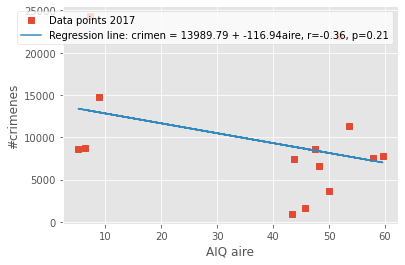

In [150]:
df_crimen_2017 = df_crimen.loc[(df_crimen['Anio'] == 2017)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2017) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2017 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2017)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2017.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2017[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2017[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2017 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2017 = resume_alcaldia_2017.transpose()
resume_alcaldia_2017['No de crimenes'] = resume_alcaldia_2017['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2017["avgAQI"].values, resume_alcaldia_2017['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2017["avgAQI"].values, resume_alcaldia_2017['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2017')
ax.plot(resume_alcaldia_2017["avgAQI"].values, intercept + slope * resume_alcaldia_2017["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

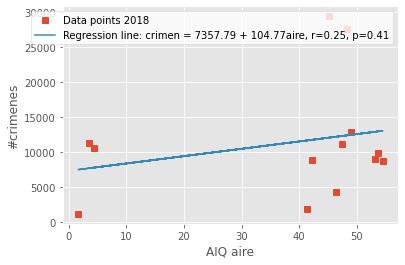

In [151]:
df_crimen_2018 = df_crimen.loc[(df_crimen['Anio'] == 2018)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2018) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2018 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2018)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2018.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2018[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2018[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2018 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2018 = resume_alcaldia_2018.transpose()
resume_alcaldia_2018['No de crimenes'] = resume_alcaldia_2018['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2018["avgAQI"].values, resume_alcaldia_2018['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2018["avgAQI"].values, resume_alcaldia_2018['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2018')
ax.plot(resume_alcaldia_2018["avgAQI"].values, intercept + slope * resume_alcaldia_2018["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

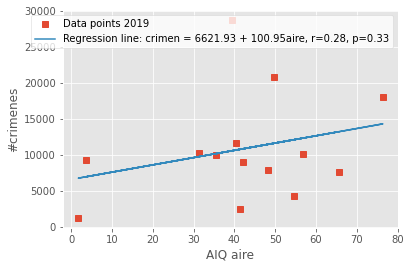

In [152]:
df_crimen_2019 = df_crimen.loc[(df_crimen['Anio'] == 2019)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2019) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2019 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2019)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2019.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2019[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2019[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2019 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2019 = resume_alcaldia_2019.transpose()
resume_alcaldia_2019['No de crimenes'] = resume_alcaldia_2019['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2019["avgAQI"].values, resume_alcaldia_2019['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2019["avgAQI"].values, resume_alcaldia_2019['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2019')
ax.plot(resume_alcaldia_2019["avgAQI"].values, intercept + slope * resume_alcaldia_2019["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

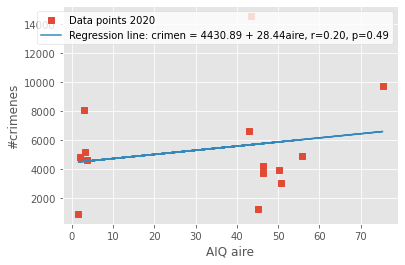

In [157]:
df_crimen_2020 = df_crimen.loc[(df_crimen['Anio'] == 2020)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2020) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2020 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2020)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2020.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2020[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2020[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2020 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2020 = resume_alcaldia_2020.transpose()
resume_alcaldia_2020['No de crimenes'] = resume_alcaldia_2020['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2020["avgAQI"].values, resume_alcaldia_2020['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2020["avgAQI"].values, resume_alcaldia_2020['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2020')
ax.plot(resume_alcaldia_2020["avgAQI"].values, intercept + slope * resume_alcaldia_2020["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

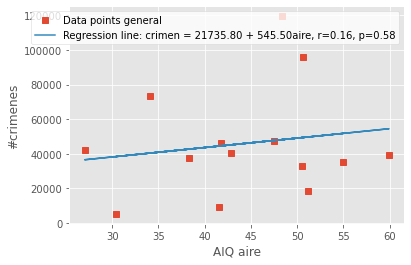

In [158]:
df_crimen_general = df_crimen.loc[(df_crimen['Anio'] != 2021)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] != 2021) & (df_aire['AQI'] != -99)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_general = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_general)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_general.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_general[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_general[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_general = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_general = resume_alcaldia_general.transpose()
resume_alcaldia_general['No de crimenes'] = resume_alcaldia_general['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_general["avgAQI"].values, resume_alcaldia_general['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_general["avgAQI"].values, resume_alcaldia_general['No de crimenes'].values, linewidth=0, marker='s', label='Data points general')
ax.plot(resume_alcaldia_general["avgAQI"].values, intercept + slope * resume_alcaldia_general["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

107.30479506790022
41.67478552556253


Text(0, 0.5, 'Probability Density')

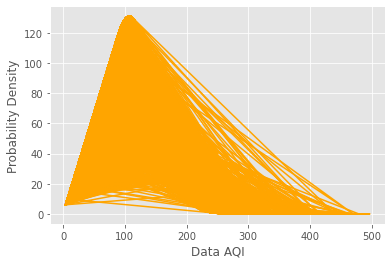

In [19]:
# Importing required libraries
 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

 
# Creating a series of data of in range of 1-50.
#x = np.linspace(1,50,200)

x_aire = y_array
 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(x_aire)
sd = np.std(x_aire)
print(mean)
print(sd)
 
#Apply function to the data.
pdf = normal_dist(x_aire,mean,sd)
 
#Plotting the Results
plt.plot(x_aire, pdf , color = 'orange')
plt.xlabel('Data AQI')
plt.ylabel('Probability Density')

In [17]:
x = np.linspace(1,50,200)

y = df_aire[(df_aire['Anio'] != 2021) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")]["AQI"]
y_array = y.to_numpy()
type(y_array)
y_array

array([176, 127, 134, ..., 144,  84, 117], dtype=int64)

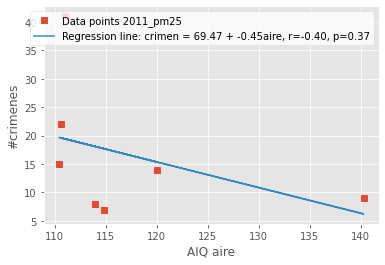

In [7]:
df_crimen_2011_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2011)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2011) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2011_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2011_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2011_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2011_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2011_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2011_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2011_pm25 = resume_alcaldia_2011_pm25.transpose()
resume_alcaldia_2011_pm25['No de crimenes'] = resume_alcaldia_2011_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2011_pm25["avgAQI"].values, resume_alcaldia_2011_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2011_pm25["avgAQI"].values, resume_alcaldia_2011_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2011_pm25')
ax.plot(resume_alcaldia_2011_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2011_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

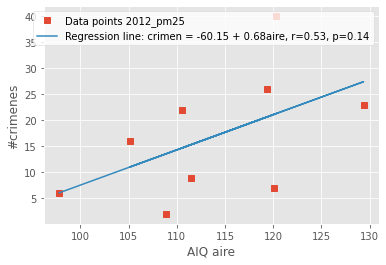

In [8]:
df_crimen_2012_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2012)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2012) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2012_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2012_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2012_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2012_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2012_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2012_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2012_pm25 = resume_alcaldia_2012_pm25.transpose()
resume_alcaldia_2012_pm25['No de crimenes'] = resume_alcaldia_2012_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2012_pm25["avgAQI"].values, resume_alcaldia_2012_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2012_pm25["avgAQI"].values, resume_alcaldia_2012_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2012_pm25')
ax.plot(resume_alcaldia_2012_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2012_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

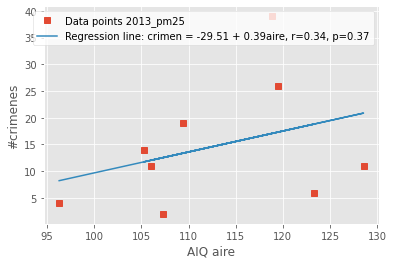

In [9]:
df_crimen_2013_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2013)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2013) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2013_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2013_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2013_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2013_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2013_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2013_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2013_pm25 = resume_alcaldia_2013_pm25.transpose()
resume_alcaldia_2013_pm25['No de crimenes'] = resume_alcaldia_2013_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2013_pm25["avgAQI"].values, resume_alcaldia_2013_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2013_pm25["avgAQI"].values, resume_alcaldia_2013_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2013_pm25')
ax.plot(resume_alcaldia_2013_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2013_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

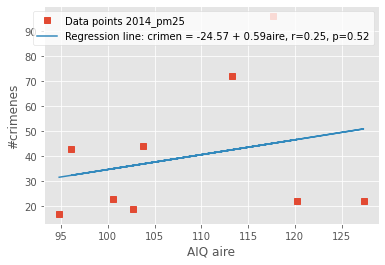

In [10]:
df_crimen_2014_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2014)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2014) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2014_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2014_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2014_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2014_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2014_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2014_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2014_pm25 = resume_alcaldia_2014_pm25.transpose()
resume_alcaldia_2014_pm25['No de crimenes'] = resume_alcaldia_2014_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2014_pm25["avgAQI"].values, resume_alcaldia_2014_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2014_pm25["avgAQI"].values, resume_alcaldia_2014_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2014_pm25')
ax.plot(resume_alcaldia_2014_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2014_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

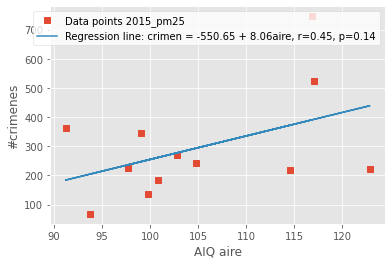

In [11]:
df_crimen_2015_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2015)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2015) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2015_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2015_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2015_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2015_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2015_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2015_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2015_pm25 = resume_alcaldia_2015_pm25.transpose()
resume_alcaldia_2015_pm25['No de crimenes'] = resume_alcaldia_2015_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2015_pm25["avgAQI"].values, resume_alcaldia_2015_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2015_pm25["avgAQI"].values, resume_alcaldia_2015_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2015_pm25')
ax.plot(resume_alcaldia_2015_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2015_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

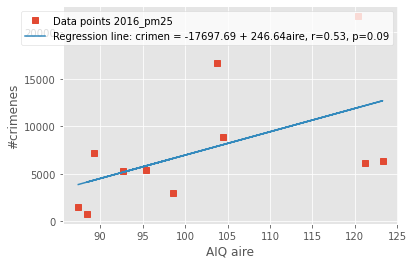

In [12]:
df_crimen_2016_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2016)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2016) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2016_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2016_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2016_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2016_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2016_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2016_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2016_pm25 = resume_alcaldia_2016_pm25.transpose()
resume_alcaldia_2016_pm25['No de crimenes'] = resume_alcaldia_2016_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2016_pm25["avgAQI"].values, resume_alcaldia_2016_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2016_pm25["avgAQI"].values, resume_alcaldia_2016_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2016_pm25')
ax.plot(resume_alcaldia_2016_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2016_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

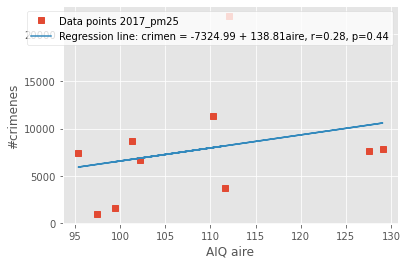

In [13]:
df_crimen_2017_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2017)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2017) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2017_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2017_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2017_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2017_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2017_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2017_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2017_pm25 = resume_alcaldia_2017_pm25.transpose()
resume_alcaldia_2017_pm25['No de crimenes'] = resume_alcaldia_2017_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2017_pm25["avgAQI"].values, resume_alcaldia_2017_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2017_pm25["avgAQI"].values, resume_alcaldia_2017_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2017_pm25')
ax.plot(resume_alcaldia_2017_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2017_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

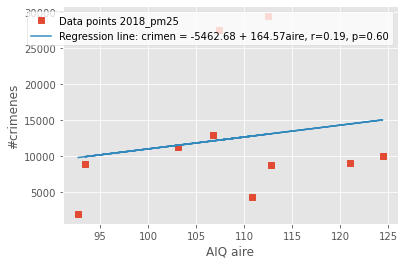

In [14]:
df_crimen_2018_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2018)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2018) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2018_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2018_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2018_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2018_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2018_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2018_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2018_pm25 = resume_alcaldia_2018_pm25.transpose()
resume_alcaldia_2018_pm25['No de crimenes'] = resume_alcaldia_2018_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2018_pm25["avgAQI"].values, resume_alcaldia_2018_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2018_pm25["avgAQI"].values, resume_alcaldia_2018_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2018_pm25')
ax.plot(resume_alcaldia_2018_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2018_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

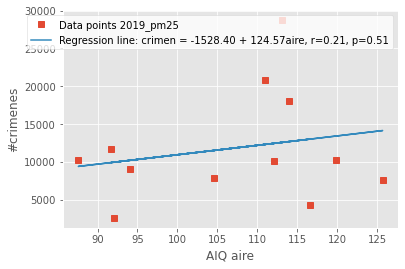

In [15]:
df_crimen_2019_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2019)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2019) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2019_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2019_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2019_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2019_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2019_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2019_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2019_pm25 = resume_alcaldia_2019_pm25.transpose()
resume_alcaldia_2019_pm25['No de crimenes'] = resume_alcaldia_2019_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2019_pm25["avgAQI"].values, resume_alcaldia_2019_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2019_pm25["avgAQI"].values, resume_alcaldia_2019_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2019_pm25')
ax.plot(resume_alcaldia_2019_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2019_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

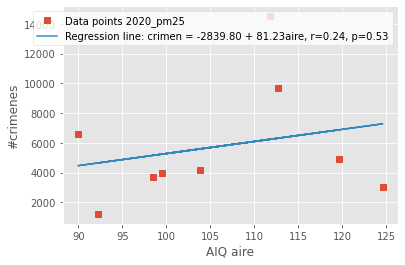

In [16]:
df_crimen_2020_pm25 = df_crimen.loc[(df_crimen['Anio'] == 2020)]["Alcaldia"].value_counts()
grouped_single = df_aire[(df_aire['Anio'] == 2020) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5")].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2020_pm25 = grouped_single.squeeze()

alcaldia_list = {}
        
for i in range(len(df_crimen_2020_pm25)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2020_pm25.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2020_pm25[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2020_pm25[df_crimen["Alcaldia"].unique()[i]])
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2020_pm25 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2020_pm25 = resume_alcaldia_2020_pm25.transpose()
resume_alcaldia_2020_pm25['No de crimenes'] = resume_alcaldia_2020_pm25['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2020_pm25["avgAQI"].values, resume_alcaldia_2020_pm25['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'

fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2020_pm25["avgAQI"].values, resume_alcaldia_2020_pm25['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2020_pm25')
ax.plot(resume_alcaldia_2020_pm25["avgAQI"].values, intercept + slope * resume_alcaldia_2020_pm25["avgAQI"].values, label=line)
ax.set_xlabel('AIQ aire')
ax.set_ylabel('#crimenes')
ax.legend(facecolor='white')
plt.show()

#& (df_aire['AQI'] > 100)

Total de crimenes: 77783
En 2018, un aumento de 10 puntos del AQI, cuando el AQI es mayor a 100, incrementa el crimen con violencia en un 1.41%


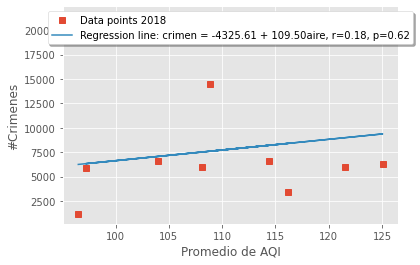

In [16]:
df_crimen_2018 = df_crimen.loc[(df_crimen['Anio'] == 2018) & (df_crimen['Categoria'] == "CON VIOLENCIA")]["Alcaldia"].value_counts()

grouped_single = df_aire[(df_aire['Anio'] == 2018) & (df_aire['AQI'] != -99) & (df_aire['Particula'] == "PM2.5") & (df_aire['AQI'] > 35)].groupby('Alcaldia').agg({'AQI': ['mean']}).sort_values(('AQI','mean'), ascending=False)
series_aire_2018 = grouped_single.squeeze()

alcaldia_list = {}
total_crimen = 0;
        
for i in range(len(df_crimen_2018)):
    if(df_crimen["Alcaldia"].unique()[i] in series_aire_2018.axes[0]):
        item_alcaldia = []
        item_alcaldia.append(series_aire_2018[df_crimen["Alcaldia"].unique()[i]])
        item_alcaldia.append(df_crimen_2018[df_crimen["Alcaldia"].unique()[i]])
        total_crimen = total_crimen + df_crimen_2018[df_crimen["Alcaldia"].unique()[i]]
        alcaldia_list[df_crimen["Alcaldia"].unique()[i]] = item_alcaldia

resume_alcaldia_2018 = pd.DataFrame(alcaldia_list, index =['avgAQI', 'No de crimenes'])
resume_alcaldia_2018 = resume_alcaldia_2018.transpose()
resume_alcaldia_2018['No de crimenes'] = resume_alcaldia_2018['No de crimenes'].astype('int64') 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(resume_alcaldia_2018["avgAQI"].values, resume_alcaldia_2018['No de crimenes'].values)
line = f'Regression line: crimen = {intercept:.2f} + {slope:.2f}aire, r={r:.2f}, p={p:.2f}'
print("Total de crimenes: " + str(total_crimen))
porcentaje = round((slope*1000)/total_crimen,2)
print("En 2018, un aumento de 10 puntos del AQI, cuando el AQI es mayor a 100, incrementa el crimen con violencia en un " + str(porcentaje) + "%")
#print("En 2018, un aumento de 10 puntos del AQI incrementa el crimen con violencia en un " + str(porcentaje) + "%")


fig, ax = plt.subplots()
ax.plot(resume_alcaldia_2018["avgAQI"].values, resume_alcaldia_2018['No de crimenes'].values, linewidth=0, marker='s', label='Data points 2018')
ax.plot(resume_alcaldia_2018["avgAQI"].values, intercept + slope * resume_alcaldia_2018["avgAQI"].values, label=line)



ax.set_xlabel('Promedio de AQI')
ax.set_ylabel('#Crimenes')

#ax.legend(facecolor='white')
legend = ax.legend(loc='upper center', shadow=True)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('white')

plt.show()